# 주제 : 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까요? 직접 데이터로 분석하고 판단해 보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Video Game Sales with Ratings을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'samjinwang'
os.environ['KAGGLE_KEY'] = "275e30bb4ec266131f19681443d436b8"

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm '*.*'
!kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
!unzip '*.zip'


rm: cannot remove '*.*': No such file or directory
  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 63.1MB/s]
Archive:  video-game-sales-with-ratings.zip
  inflating: Video_Games_Sales_as_at_22_Dec_2016.csv  


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [7]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거
df.dropna(inplace = True)
df.isna().sum()





Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [9]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


### 문제 5. 수치형 데이터의 히스토그램 확인하기


In [10]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

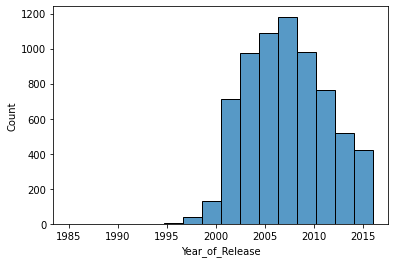

In [11]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인
sns.histplot(x='Year_of_Release',data=df, bins = 16)

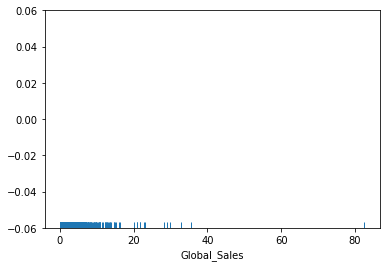

In [12]:
sns.rugplot(x='Global_Sales',data=df) # 엄청큰 숫자가 하나 보임

In [13]:
df[df['Global_Sales']>30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [14]:
gs = df['Global_Sales'].quantile(0.99)
print(gs)
df = df[df['Global_Sales']<gs]

7.167600000000002


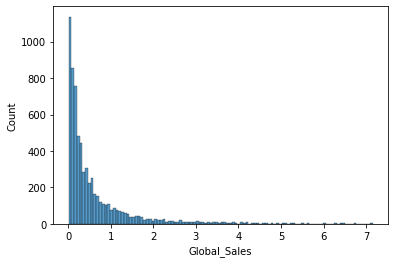

In [15]:
sns.histplot(x="Global_Sales", data = df)

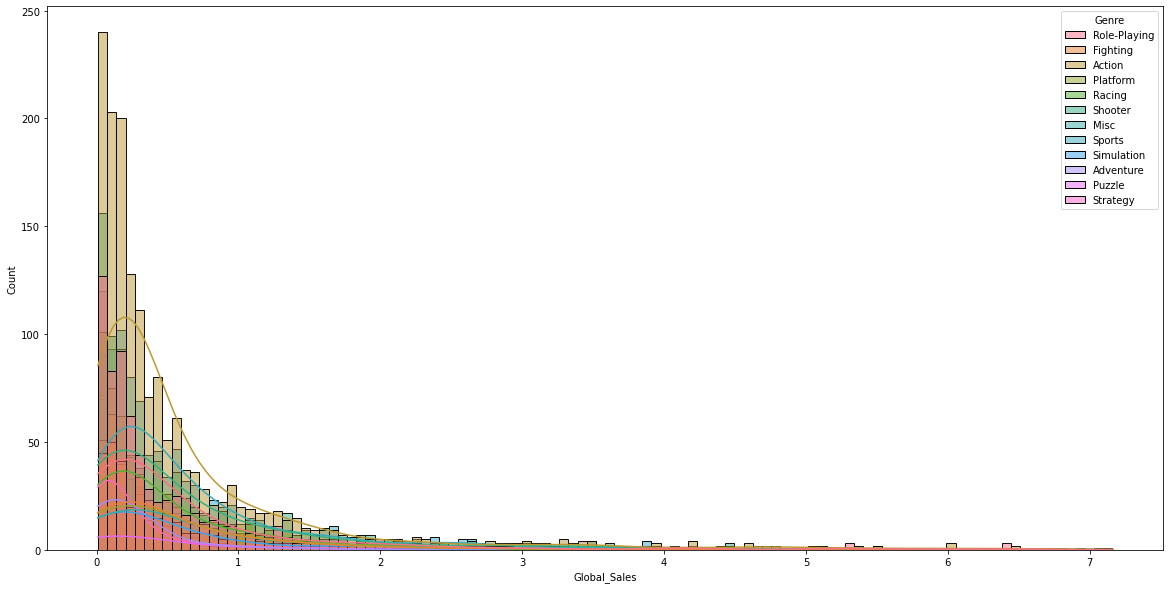

In [16]:
plt.figure(figsize = (20,10))
sns.histplot(x="Global_Sales", data = df, hue = "Genre", kde = True)
# 워낙 종류가 많아서 추후 범주형 데이터를 볼때 박스플랏으로 보면 좋을 것같다

In [17]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

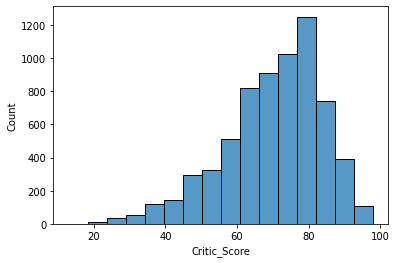

In [18]:
sns.histplot(x='Critic_Score',data = df, bins = 16) #높은 점수대에는 박하다

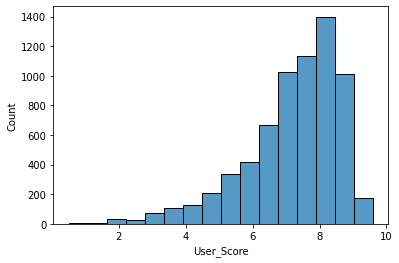

In [19]:
#sns.histplot(x='User_Score',data = df, bins = 16) #score가 숫자형로 되어있는거 같지가 않음

sns.histplot(data = df['User_Score'].apply(float), bins = 16) #문자열로 되어있는 숫자를 float으로 만들어서 본다
#critic 보단 높은쪽 점수에 후함

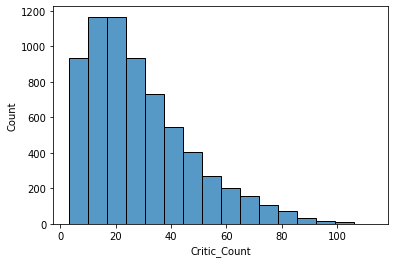

In [20]:
sns.histplot(x = 'Critic_Count',data = df,bins = 16)

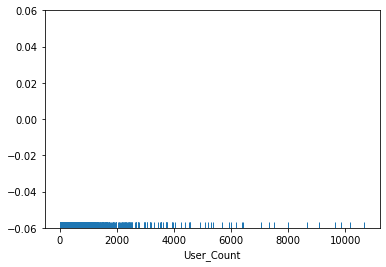

In [21]:
sns.rugplot(x = 'User_Count', data = df)

In [22]:
uc = df['User_Count'].quantile(0.99)

In [23]:
df = df[df['User_Count'] < uc]

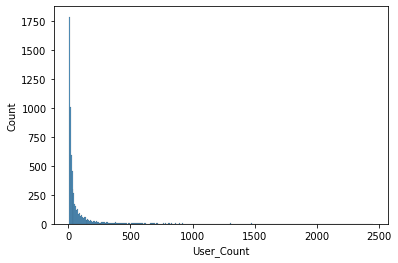

In [24]:
sns.histplot(x = 'User_Count', data = df)

In [25]:
uc = df['User_Count'].quantile(0.97)
print(uc)

911.5599999999977


In [26]:
df = df[df['User_Count'] < uc]

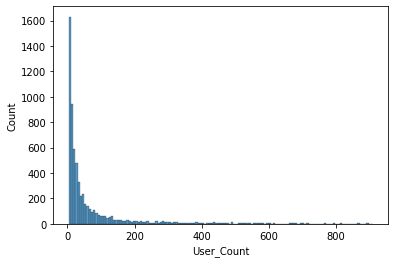

In [27]:
sns.histplot(x = 'User_Count', data = df)

### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

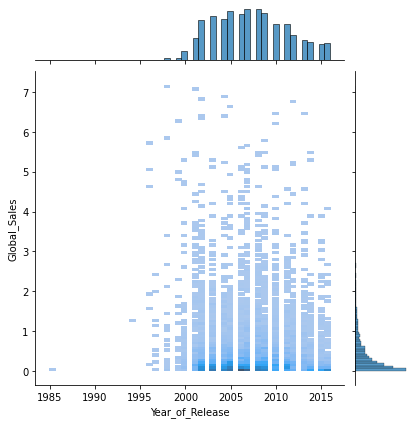

In [28]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석

sns.jointplot(x='Year_of_Release',y = 'Global_Sales',data = df, kind = 'hist') #값들이 떨어져있고 상관성이 그리 있어보이지 않음ㅠ





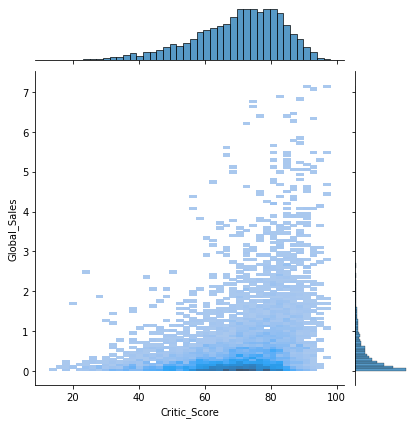

In [29]:
sns.jointplot(x='Critic_Score',y = 'Global_Sales',data = df, kind = 'hist') #상관성있음 -> 평이 좋을수록 많이 팔리는 편임
# 물론 전문가 평점이 높다고 무조건 판매가 높은건 아니지만 대체로 그렇다

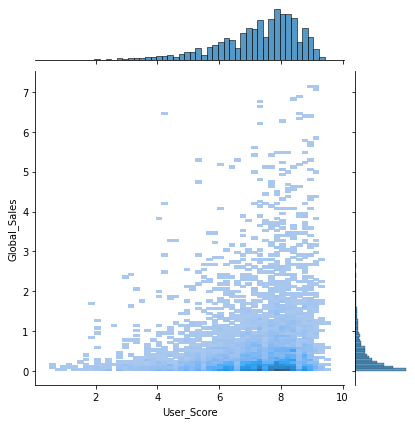

In [30]:
df['User_Score'] = df['User_Score'].apply(float)
sns.jointplot(x='User_Score',y = 'Global_Sales',data = df, kind = 'hist') #평론가 평점과 비슷한 양상이지만 조금 덜함

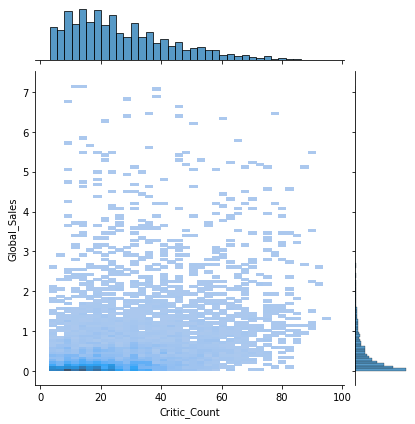

In [31]:
sns.jointplot(x='Critic_Count',y = 'Global_Sales',data = df, kind = 'hist') #평론가 숫자가 적을땐 판매량이 한쪽에 분포하지만
#평론가가 많이 붙은 것은 판매량이 고루 분포되어있다
#즉 평론가가 더 많이 평할수록 글로벌 세일이 더 높아보인다

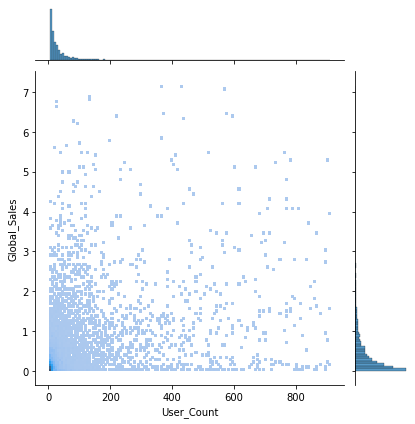

In [32]:
sns.jointplot(x='User_Count',y = 'Global_Sales',data = df, kind = 'hist') #판매량에 따라 평의 갯수가 천차만별임
# 보통의 게임들은 극소수의 유저에게만 평가를 받음. 

#평가 갯수는 서로 필요조건인것같다 -> 유저카운트와 유저스코어는 빼야할것같다 

### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

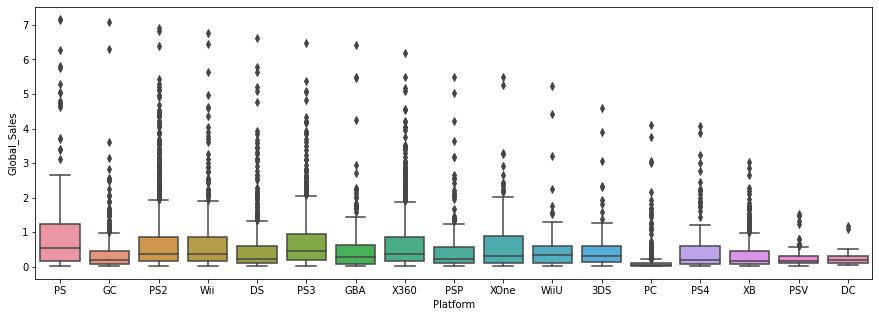

In [33]:
# 필요한 feature인지 꼭 확인해줘야한다
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Platform', y = 'Global_Sales',data = df)
#플스 시리즈가 좀 평균이 높은편
#wii도 잘 나감
#pc 게임은 많이 출시되어 평균이 좀 낮은것처럼 보임


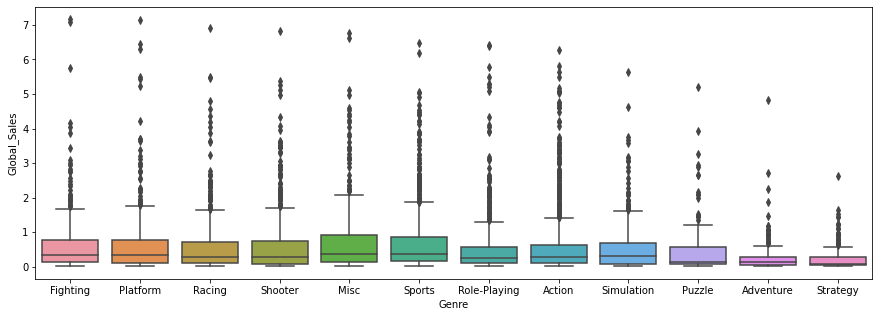

In [34]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Genre', y = 'Global_Sales',data = df)
#전략, 어드벤체는 좀 낮고, puzzle도 평균치가 굉장히 낮음
#스포츠,레이싱, 파이팅들이 좀 날나가는 장르

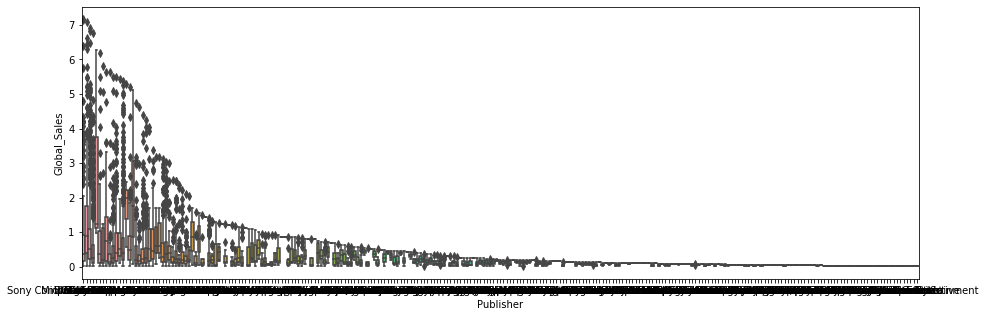

In [35]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Publisher', y = 'Global_Sales',data = df) #유통사 종류가 너무 많아 보기 힘듬 -> 서로 편차가 심한건 알수 있음
#(제작사랑 다른 개념임)

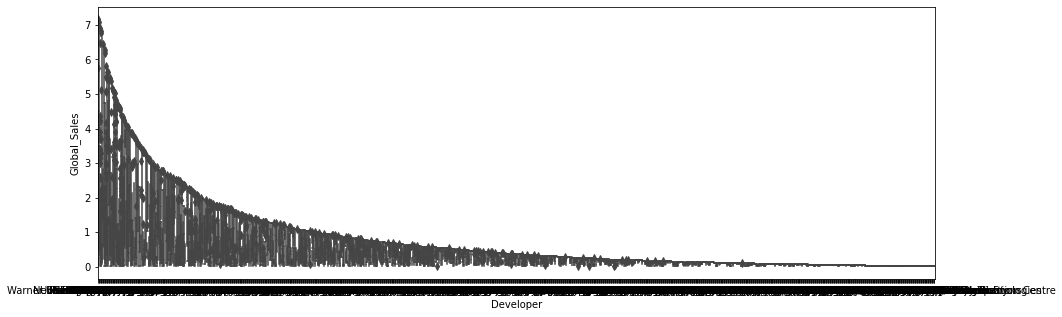

In [36]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Developer', y = 'Global_Sales',data = df) #publisher랑 마찬가지임 -> 소수 클래스로 묶어 작업하는게 필요할듯함

### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

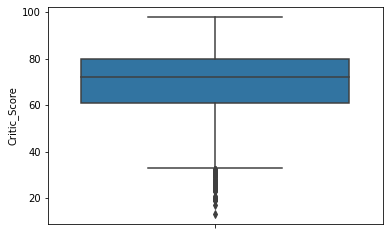

In [37]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계 비교/분석하기
# Hint) 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# Tip) 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리함

sns.boxplot(y = 'Critic_Score', data = df)



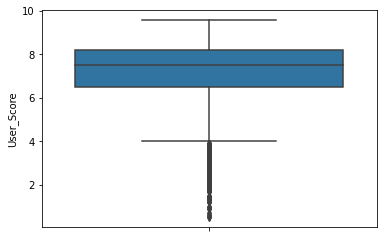

In [38]:
sns.boxplot(y = 'User_Score', data = df)

In [39]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score' : 'Score'}, axis = 1, inplace = True)
critic_score['ScoreBy'] = 'Critics'

In [40]:
critic_score

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,46.0,Critics
16677,81.0,Critics
16696,80.0,Critics
16700,61.0,Critics


In [41]:
user_score = df[['User_Score']].copy() *10
user_score.rename({'User_Score' : 'Score'}, axis = 1, inplace = True)
user_score['ScoreBy'] = 'Users'
user_score

,Score,ScoreBy
106,91.0,Users
109,89.0,Users
111,91.0,Users
113,86.0,Users
114,85.0,Users
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


In [42]:
scores = pd.concat([critic_score, user_score], axis = 0)
scores

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


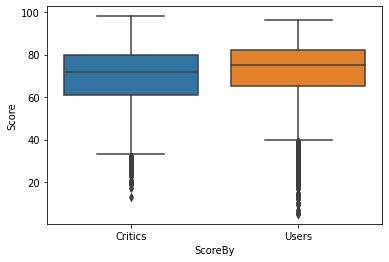

In [43]:
sns.boxplot(x='ScoreBy', y = 'Score', data = scores)

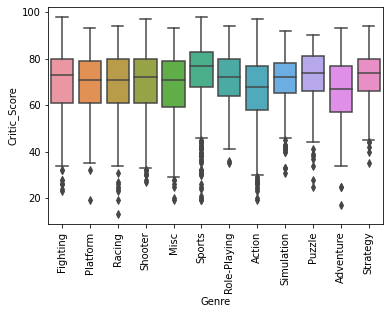

In [44]:
sns.boxplot(x='Genre', y = 'Critic_Score', data = df)
plt.xticks(rotation = 90)
plt.show()
#어드벤쳐는 평점이 짜다
#스포츠,격투가 좀 후하게 줌

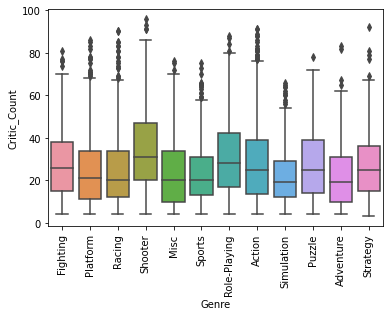

In [45]:
sns.boxplot(x='Genre', y = 'Critic_Count', data = df)
plt.xticks(rotation = 90)
plt.show()
#많으면 기대작일것 -> 총쏘는 게임이 높다, 스포츠는 낮다(기대치는 낮지만 돈은 잘벌리는듯)
#위에 비교하여 게임 특정장르에 대한 기대치와 실제 평가에 대한 비교를 할 수 있을것 같다

### 문제 9. 수치형 데이터간의 상관성 시각화하기

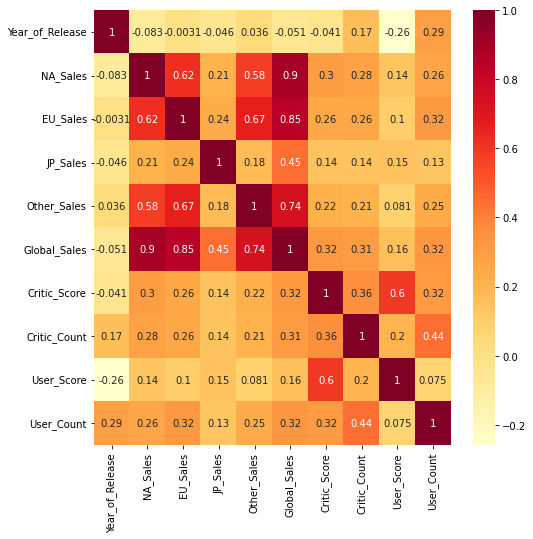

In [46]:
# Correlation Heatmap 시각화하기
fig = plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlOrRd')

#북미,유럽 판매가 전체 판매량 연관이 있다
#일본 판매는 전체판매와 상대적으로 덜 상관성이 있다
#전문가 평가횟수와 평가점수랑 판매량이 은근 상관성이있다
#유저 평가와 판매량은 그리 상관관계가 없다
#유저 평가횟수는 상관성이 높은데 아마 판매량과 필요조건이라 그런거 같다
#유저스코어와 전문가 스코어가 상관성이 높음 -> 판매량이 높다해서 유저의 만족도와 직접적인 연관이 있는것 같지는 않다


## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

Electronic Arts                902
Ubisoft                        468
Activision                     458
THQ                            301
Sony Computer Entertainment    287
                              ... 
Lighthouse Interactive           1
Sunflowers                       1
Dusenberry Martin Racing         1
Alternative Software             1
Popcorn Arcade                   1
Name: Publisher, Length: 253, dtype: int64


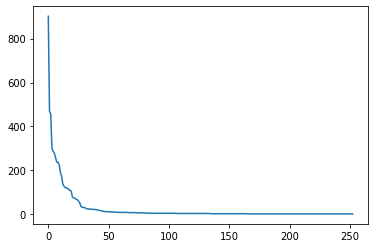

In [47]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인
pb = df['Publisher'].value_counts()
print(pb)
plt.plot(range(len(pb)),pb)
#소수 유통사가 장악하고 있는 형세
#상위 20개 밖에는 other로 묶는다




(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

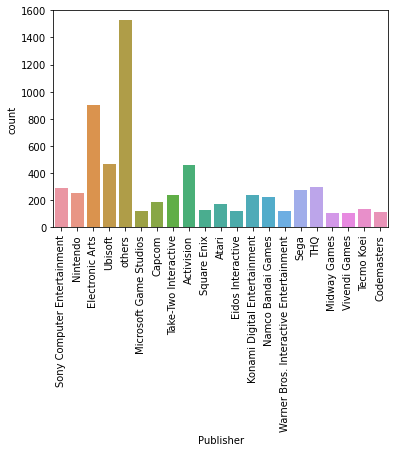

In [48]:
df['Publisher'] = df['Publisher'].apply(lambda s: s if s not in pb[20:] else 'others')
sns.countplot(x = 'Publisher',data = df)
plt.xticks(rotation = 90) #적당한 수준으로 정리되었다

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

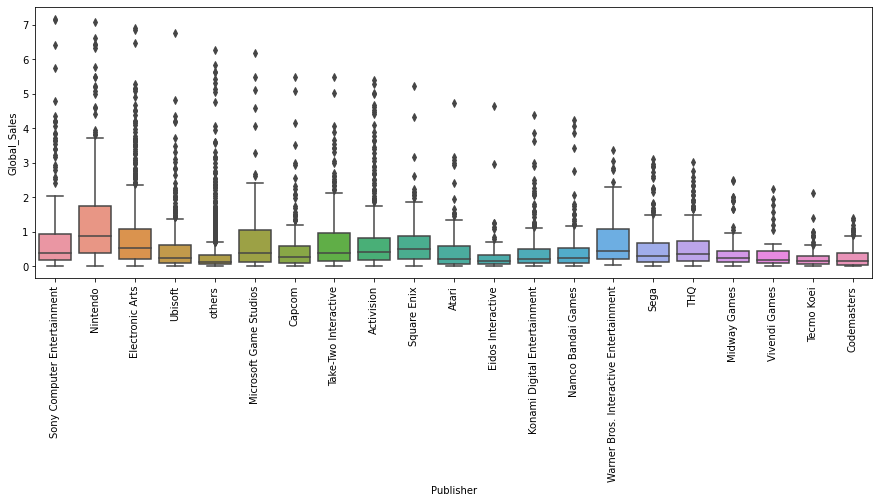

In [49]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = 'Publisher', y = 'Global_Sales', data = df)
plt.xticks(rotation = 90)
#닌텐도 잘나감
#sony는 플스거라 잘되는듯
#electronic arts는 스포츠 브랜드라 잘되는듯
#publsiher 를 카테고리로 이용하면 global sales를 잘 할 수 있을듯

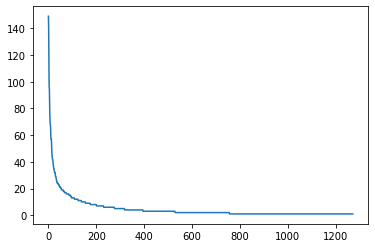

In [52]:
dev = df['Developer'].value_counts()
plt.plot(range(len(dev)),dev)
#이것또한 소수 개발사가 다 잡고있는 형세 -> 상위 20개와 기타로 나눈다

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

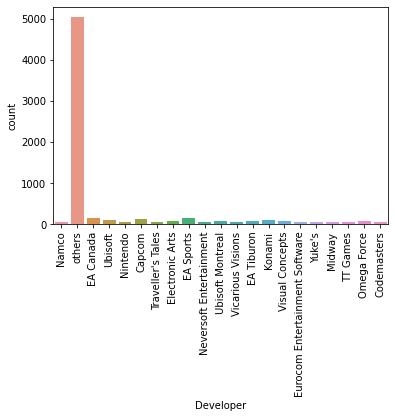

In [53]:
df['Developer'] = df['Developer'].apply(lambda s: s if s not in dev[20:] else 'others')
sns.countplot(x = 'Developer',data = df)
plt.xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

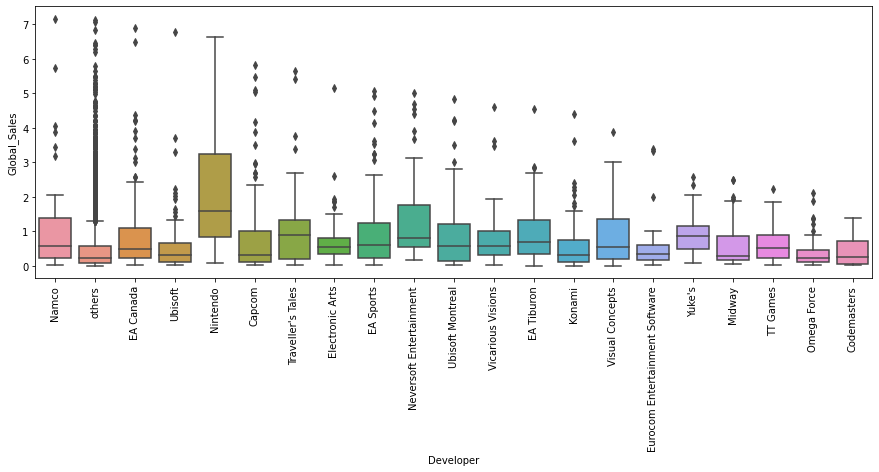

In [55]:
fig = plt.figure(figsize = (15,5))
sns.boxplot(x = 'Developer', y = 'Global_Sales', data = df)
plt.xticks(rotation = 90)
#닌텐도는 아웃라이어 조차 없다
#기타를 제외하고 나머지는 그대로 써도 될만큼 좋은 통계값들을 가지고 있는듯함

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [56]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [57]:
X_cat = df[['Platform', 'Genre', 'Publisher']]

X_cat = pd.get_dummies(X_cat, drop_first = True)




## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화
X_num = df[['Year_of_Release','Critic_Score','Critic_Count']] #user의 평점이나 평가횟수는 발매량에 영향을 받은것이므로 빼는걸로 함
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

X = pd.concat([X_scaled,X_cat], axis = 1) 
y = df["Global_Sales"]




In [63]:
X.head()

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Atari,Publisher_Capcom,Publisher_Codemasters,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Midway Games,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,-2.237912,1.944152,-0.704478,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
109,-2.237912,1.577371,-0.874440,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,-1.514757,1.650727,0.598567,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,-0.791602,0.917163,0.655221,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,-1.273706,1.357302,0.088680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [64]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)





### 문제 13. XGBoost 모델 생성/학습하기

In [65]:
from xgboost import XGBRegressor

In [66]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train) 




[13:43:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 14. Linear Regression 모델 생성/학습하기

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 15. 모델 학습 결과 평가하기

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [71]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE: ',mean_absolute_error(y_test,pred_xgb))
print('XGB RMSE: ', sqrt(mean_squared_error(y_test,pred_xgb)))

print('LR MAE: ',mean_absolute_error(y_test,pred_lr))
print('LR RMSE: ', sqrt(mean_squared_error(y_test,pred_lr)))




XGB MAE:  0.39659319130408194
XGB RMSE:  0.6821165671897874
LR MAE:  0.4435623723861831
LR RMSE:  0.7033240396642875


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


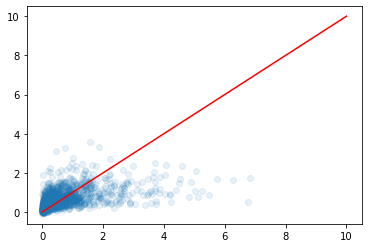

In [72]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha = 0.1)
plt.plot([0,10],[0,10], 'r-')

#낮은 값들로 예상되어 지는경향
#적게 팔린애들은 좀 비싸게, 많이 팔리는 애들은 좀 낮게 예측됨
#적게 팔린애들이 데이터가 많아 그쪽에 집중에서 학습을 한 결과 판매량이 많은 애들이 값이 덜 정확히 예측됨(애초에 많이 팔린애들이 아웃라이어에 있긴함)



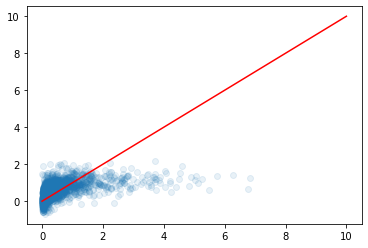

In [74]:
plt.scatter(y_test, pred_lr, alpha = 0.1)
plt.plot([0,10],[0,10], 'r-')
# 값들을 weighting에서 더하기만 해서 값이 올라가는 쪽으로 fit을 하여 낮은 값들이 음수로 떨어지는 일이 발생하기도 함

### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

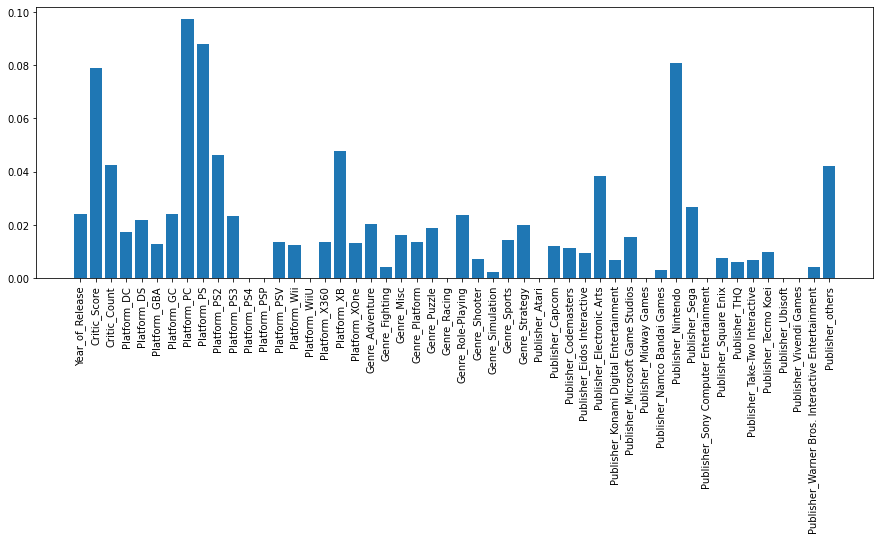

In [75]:
fig = plt.figure(figsize = (15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()
#pc가 플랫폼일때 큼(pc가 안팔린애들이 많기 때문일듯)
#닌텐도는 잘팔린다란걸 전에 알수 잇듯이 중요도도 높게 나온듯



## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [76]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [80]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

# 유저가 해당게임이 맘에 들어할지 여부

X_num = df[['Year_of_Release','Critic_Score','Critic_Count']] #user의 평점이나 평가횟수는 발매량에 영향을 받은것이므로 빼는걸로 함
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

X = pd.concat([X_scaled,X_cat], axis = 1) 
#분리가 저 잘되기위해 x를 한번더 정의해줌

y = df["User_Score"]




In [82]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)





### 문제 19. XGBoost 모델 생성/학습하기

In [83]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train) 




[14:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 20. Linear Regression 모델 생성/학습하기

In [84]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train,y_train) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 21. 모델 학습 결과 평가하기

In [85]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE: ',mean_absolute_error(y_test,pred_xgb))
print('XGB RMSE: ', sqrt(mean_squared_error(y_test,pred_xgb)))

print('LR MAE: ',mean_absolute_error(y_test,pred_lr))
print('LR RMSE: ', sqrt(mean_squared_error(y_test,pred_lr)))




XGB MAE:  0.74224728947734
XGB RMSE:  1.0158512368202421
LR MAE:  0.779957137091311
LR RMSE:  1.0532062590705695


### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


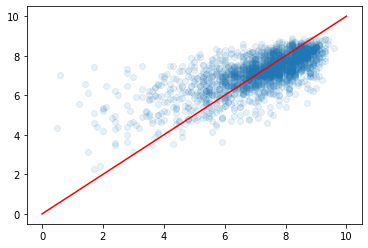

In [86]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha = 0.1)
plt.plot([0,10],[0,10], 'r-')

#만족도를 좀 높게 예측하는 경향
#측정값이 낮을수록 좀 높게 예측. 점수가 높은건 잘 예측



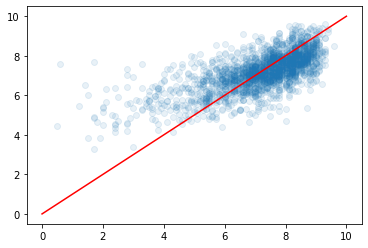

In [87]:
plt.scatter(y_test, pred_lr, alpha = 0.1)
plt.plot([0,10],[0,10], 'r-')

### 문제 23. XGBoost 모델의 Feature Importance 시각화하기

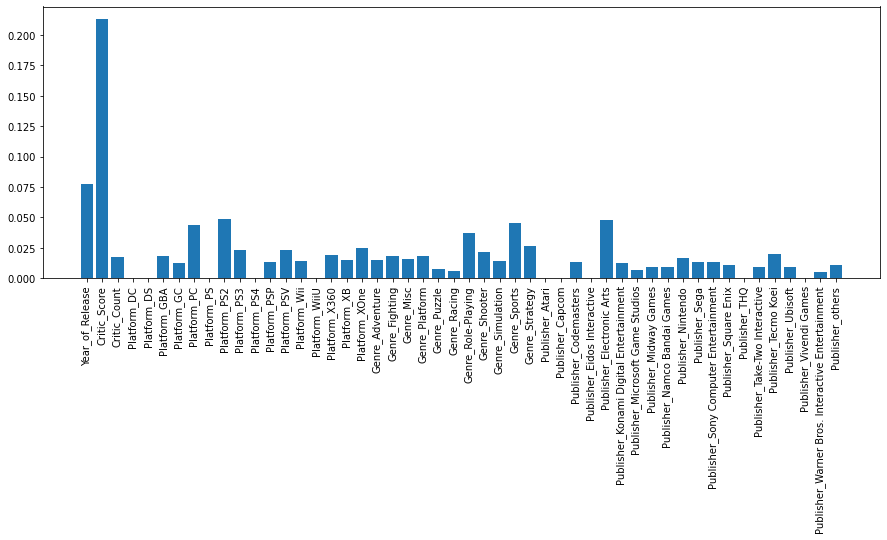

In [88]:

fig = plt.figure(figsize = (15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

#critic score가 가장높다 -> 확실히 평론가가 평가를 많이하고 점수를 잘준게 판매량에 많은 영향을 준다고 보여진다
#출시년도도 높지만 좀 무시해도 되긴할듯
